In [9]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import tensorflow as tf
tf.python.control_flow_ops = tf

import lstm, time #helper libraries
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
#Step 1 Load Data #load_data(filename, seq_len, normalise_window)
look_back = 50
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', look_back, True)

print(X_train)

[[[ 0.        ]
  [ 0.00244147]
  [-0.00517326]
  ..., 
  [ 0.02629281]
  [ 0.02805996]
  [ 0.02100013]]

 [[ 0.        ]
  [ 0.03589635]
  [ 0.03389286]
  ..., 
  [ 0.06150306]
  [ 0.02871407]
  [ 0.02953055]]

 [[ 0.        ]
  [-0.0182514 ]
  [-0.00809052]
  ..., 
  [-0.05174422]
  [-0.05740756]
  [-0.06031314]]

 ..., 
 [[ 0.        ]
  [-0.00577057]
  [-0.02031898]
  ..., 
  [-0.04424687]
  [-0.04489191]
  [-0.05500347]]

 [[ 0.        ]
  [-0.01170109]
  [-0.01448985]
  ..., 
  [ 0.00903544]
  [ 0.00247832]
  [ 0.01061454]]

 [[ 0.        ]
  [ 0.01020173]
  [ 0.01550685]
  ..., 
  [ 0.04245359]
  [ 0.04563545]
  [ 0.04210077]]]


In [12]:
#Step 2 Build Model
batch_size = 1
epochs=1
model = Sequential()

model.add(LSTM(50,batch_input_shape=(batch_size, look_back, 1),return_sequences=True))#, dropout_W=0.2))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False)) #, dropout_W=0.2))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  4.08987784386


In [13]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    nb_epoch=epochs,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 244s - loss: 5.6529e-04 - val_loss: 1.7609e-04

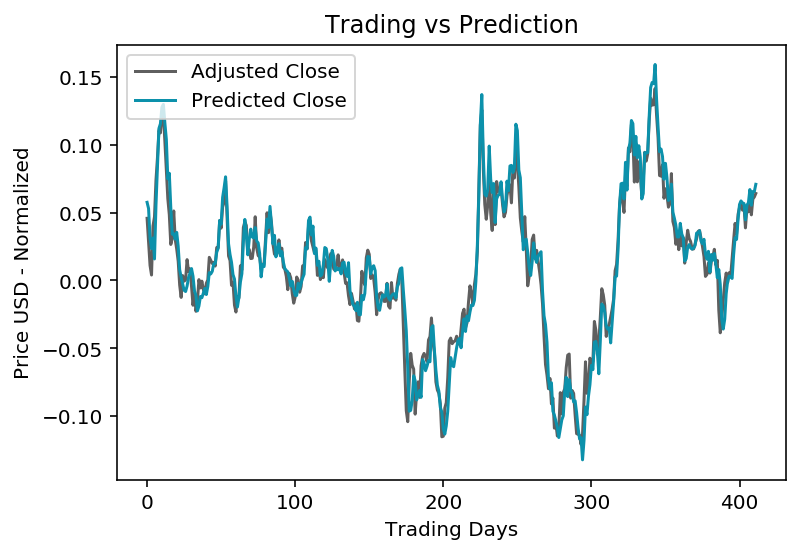

In [14]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, batch_size, batch_size)
#lstm.plot_results_multiple(predictions, y_test, batch_size)


# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Add labels
plt.ylabel('Price USD - Normalized')
plt.xlabel('Trading Days')
# Plot actual and predicted close values

plt.plot(y_test,'#5F5F5F', label='Adjusted Close')
plt.plot(predictions, '#0C91AB', label='Predicted Close')

# Set title
ax.set_title('Trading vs Prediction')
ax.legend(loc='upper left')

plt.show()

In [15]:
preds = np.array(predictions).flatten()
#print(preds)
# The mean squared error
from sklearn.metrics import mean_squared_error
import math
testScore = mean_squared_error(y_test, preds)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Test Score: 0.0002 MSE (0.0124 RMSE)


No Dropout: Test Score: 0.0003 MSE (0.0173 RMSE)

Dropout 20%: Test Score: 0.0002 MSE (0.0124 RMSE)